In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
plays = pd.read_csv('/home/travis/NFL/Analysis/Run_Pass_Ratio/Data/TimePlaycalling.csv')

plays.describe()



,gsis_id,drive_id,home_score,away_score,pass,rush
count,3.620040e+05,362004.000000,362004.000000,362004.000000,362004.000000,362004.000000
mean,2.012664e+09,12.344043,11.832983,10.437852,0.418459,0.304513
std,2.292646e+06,7.168458,10.218419,9.563541,0.493441,0.460232
min,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.011091e+09,6.000000,3.000000,3.000000,0.000000,0.000000
50%,2.013091e+09,12.000000,10.000000,7.000000,0.000000,0.000000
75%,2.015091e+09,18.000000,17.000000,17.000000,1.000000,1.000000
max,2.017010e+09,35.000000,62.000000,59.000000,2.000000,2.000000


In [3]:
# Remove plays that are not pass or rush plays ie. Kickoff, Punts, Penalty etc.

plays=plays[(plays['pass']!=0) | (plays['rush']!=0)]

In [4]:
#Create A new Column called pointdiff which calculates the Possesing teams point diff
# Example a team w/ possesion leading by 5 would have a point diff of 5, while a team losing by 5 would have pointdiff of -5 
plays['pointdiff']=0
plays.loc[plays['pos_team']== plays['home'], 'pointdiff']= plays.loc[plays['pos_team']== plays['home'], 'home_score']- plays.loc[plays['pos_team']== plays['home'], 'away_score']
plays.loc[plays['pos_team']== plays['away'], 'pointdiff']= plays.loc[plays['pos_team']== plays['away'], 'away_score']- plays.loc[plays['pos_team']== plays['away'], 'home_score']
#df.loc[df['line_race'] == 0, 'rating'] = 0

In [5]:
#Group into quarters
quarterOne=plays[plays['quarter']=='1']
quarterTwo=plays[plays['quarter']=='2']
quarterThree=plays[plays['quarter']=='3']
quarterFour=plays[plays['quarter']=='4']
Overtime=plays[plays['quarter']=='T']

#.agg({'pass': ['mean', 'count'], 'rush': 'mean'})

In [6]:

#Group by point differential of possesing team
#remove groups with fewer than 20 rows
# Calculate mean rush, which gives us the run/pass ratio

#Quarter One
grouped=quarterOne.groupby(['pointdiff'])
grouped=grouped.filter(lambda x: len(x) > 20)
quarterOne=grouped.groupby(['pointdiff']).agg({'rush': 'mean', 'pass': 'mean'})

#Quarter Two
grouped=quarterTwo.groupby(['pointdiff'])
grouped=grouped.filter(lambda x: len(x) > 20)
quarterTwo=grouped.groupby(['pointdiff']).agg({'rush': 'mean', 'pass': 'mean'})

#Quarter Three
grouped=quarterThree.groupby(['pointdiff'])
grouped=grouped.filter(lambda x: len(x) > 20)
quarterThree=grouped.groupby(['pointdiff']).agg({'rush': 'mean', 'pass': 'mean'})


#Quarter Four
grouped=quarterFour.groupby(['pointdiff'])
grouped=grouped.filter(lambda x: len(x) > 20)
quarterFour=grouped.groupby(['pointdiff']).agg({'rush': 'mean', 'pass': 'mean'})


In [7]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import seaborn as sns


## First Quarter
In the first quarter teams remained confident in thier game plan by remaining balanced with a Pass/Run ratio of hovering around 55% regardless of Point Differential.

<IPython.core.display.Javascript object>


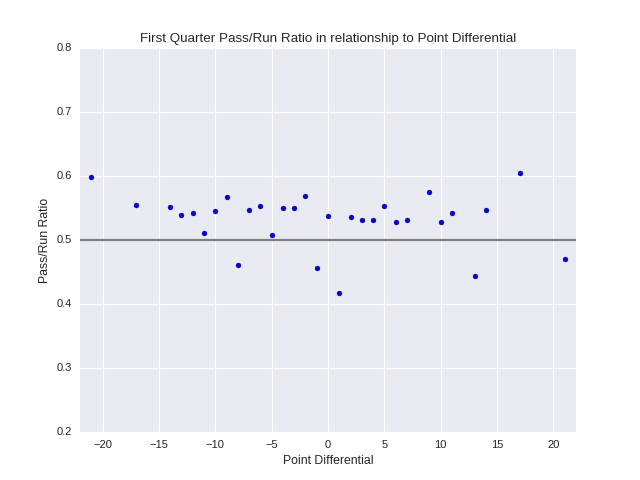

In [8]:
fig, ax = plt.subplots()

ax.scatter(quarterOne.index, quarterOne['pass'])

ax.axhline(.5, color='grey', linewidth=2)

ax.set_yticks([.2,.3,.4,.5,.6,.7,.8,])
ax.set_xticks([-20,-15,-10,-5,0,5,10,15,20])
ax.set_title('First Quarter Pass/Run Ratio in relationship to Point Differential')
ax.set_xlim(-22,22)

plt.ylabel('Pass/Run Ratio')
plt.xlabel('Point Differential')

## Second Quarter

In the second quarter playcalling begins to trend more towards passing. Some of this increase can be explained by teams trying to get a quick score before halftime, which will be shown in later visuals. Additionally teams losing by multiple possesions begin increasing pass playcalls in an attempt to limit opposing teams lead before halftime.

<IPython.core.display.Javascript object>


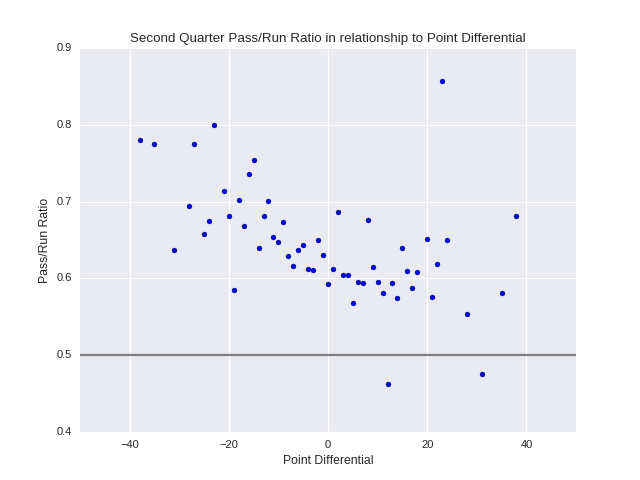

In [9]:
fig, ax = plt.subplots()

ax.scatter(quarterTwo.index, quarterTwo['pass'])
ax.axhline(.5, color='grey', linewidth=2)
ax.set_title('Second Quarter Pass/Run Ratio in relationship to Point Differential')

plt.ylabel('Pass/Run Ratio')
plt.xlabel('Point Differential')

## Third Quarter

In the third quarter the pass/run ratio has a much higher correlation to point differntial than the previous quarters. As losing teams begin to significantly increase passing playcalls. Meanwhile winning begin running the ball in an attempt to kill clock and preserve thier lead.

<IPython.core.display.Javascript object>


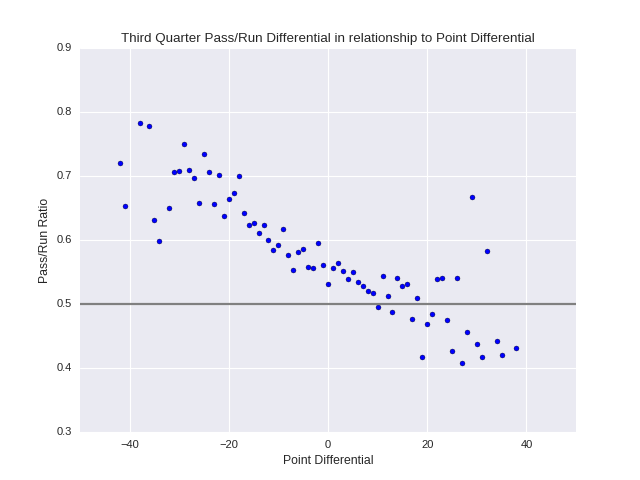

In [10]:
fig, ax = plt.subplots()

ax.scatter(quarterThree.index, quarterThree['pass'])
ax.axhline(.5, color='grey', linewidth=2)
ax.set_title('Third Quarter Pass/Run Differential in relationship to Point Differential')

plt.ylabel('Pass/Run Ratio')
plt.xlabel('Point Differential')

## Fourth Quarter

Here we see the most dramatic differences between winning and losing teams play calling, we see winning teams preserving their lead by calling run plays greater than 60% of the time. While losing teams try to throw their way back into the game by calling pass plays on anywhere from 70-90% depending on point differential. Additionally we see teams losing about insurmountable deficits "throw in the towel" and return to a more balanced offense.

<IPython.core.display.Javascript object>


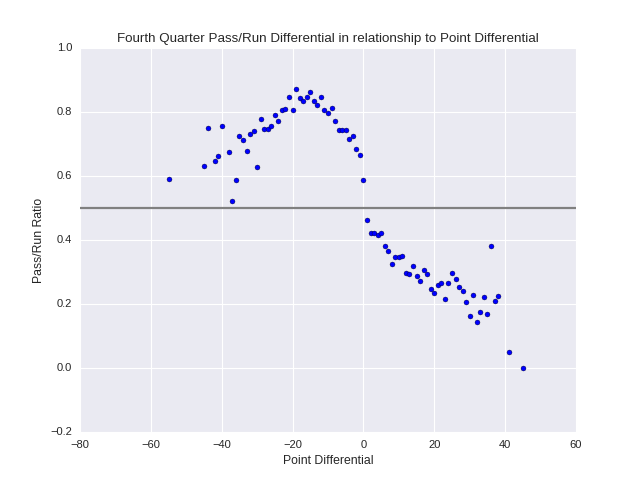

In [11]:
fig, ax = plt.subplots()

ax.scatter(quarterFour.index, quarterFour['pass'])
ax.axhline(.5, color='grey', linewidth=2)

ax.set_title('Fourth Quarter Pass/Run Differential in relationship to Point Differential')

plt.ylabel('Pass/Run Ratio')
plt.xlabel('Point Differential')

In [12]:
#Remove overtime 
plays=plays[plays['quarter']!='T']

In [13]:
plays['time']=plays['time'].apply(pd.to_numeric)/60

In [14]:
plays.head()

,gsis_id,drive_id,pos_team,home,home_score,away,away_score,pass,rush,quarter,time,pointdiff
2,2009091000,1,PIT,PIT,0,TEN,0,1,0,1,1.416667,0
3,2009091000,1,PIT,PIT,0,TEN,0,1,0,1,0.116667,0
4,2009091000,1,PIT,PIT,0,TEN,0,0,1,1,0.733333,0
5,2009091000,2,TEN,PIT,0,TEN,0,0,1,1,1.733333,0
6,2009091000,2,TEN,PIT,0,TEN,0,0,1,1,2.816667,0


In [15]:
#Convert (Quarters played, time elapsed in quarter) to game time.
#quarter = 15 minutes 
#ie. (Quarter 3, 2 ) = (3-1) quarters played * 15 + 2 =32

#2nd quarter
plays.loc[plays['quarter']== '2', 'time']= plays.loc[plays['quarter']== '2', 'time']+15
#3rd quarter
plays.loc[plays['quarter']== '3', 'time']= plays.loc[plays['quarter']== '3', 'time'] + 30

#4th quarter
plays.loc[plays['quarter']== '4', 'time']= plays.loc[plays['quarter']== '4', 'time']+ 45




In [16]:
plays=plays.round({'time' : 0})

## Playcalling by Game Time

Here is a graph detailing pass/rush playcalling tendencies regardless of point differential. It shows a small but steady increase of pass playcalls as the game progresses, with spikes at the end of the half and also at the end of regulation.

<IPython.core.display.Javascript object>


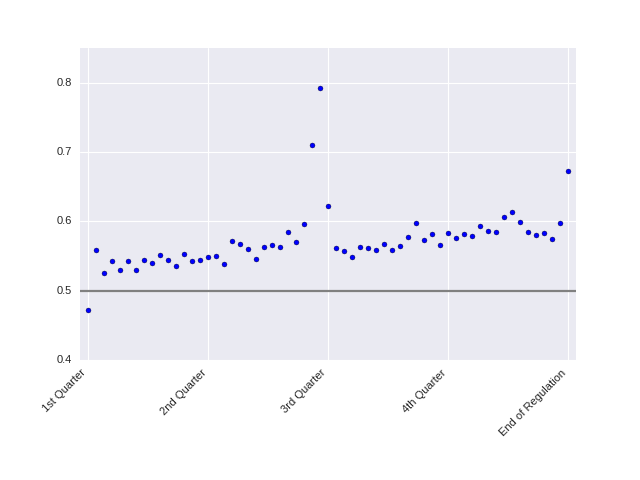

In [17]:
fig, ax = plt.subplots()
df=plays.groupby(['time'])['pass', 'rush'].mean()
plt.scatter(df.index, df['pass'])

ax.axhline(.5, color='grey', linewidth=2)
ax.set_xticks([0,15,30, 45, 60])
ax.set_xticklabels(['1st Quarter','2nd Quarter', '3rd Quarter', '4th Quarter' , 'End of Regulation'])
ax.set_xlim(-1,61)


x = ax.xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment("right")
    
plt.subplots_adjust(bottom=0.25)

In [18]:
grouped=plays.groupby(['pointdiff', 'time'])
grouped=grouped.filter(lambda x: len(x) > 5)
pdBytime=grouped.groupby(['pointdiff','time']).agg({'rush': ['mean', 'count'], 'pass': 'mean'})
#pdBytime['rush']
#pdBytime.index[1]
s=pdBytime.index.tolist()
x=zip(*s)
#x[1]

## Run/Pass Ratio based on Point Differential and Remaining Time

In the below plot Point differential and Game time are located on the axes, with each tick on the x-axis representing one minute of game time. A color bar is then used to represent the pass/run ratio. By plotting time minute by minute as opposed to generalizing over an entire quarter we get a much more detailed plot, giving us a more precise representation of when teams chose to change playcall strategy in response to game situations.

<IPython.core.display.Javascript object>


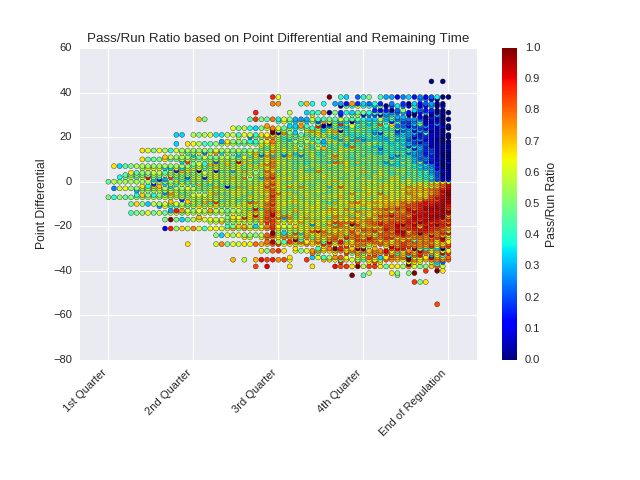

In [19]:
fig, ax = plt.subplots(facecolor='w')
#df=plays.groupby(['time'])['pass', 'rush'].mean()
plt.scatter(x[1], x[0], c=pdBytime['pass'], cmap= 'jet')
#plt.scatter(x, y, c=t, cmap='viridis')
cbar=plt.colorbar()
cbar.set_label('Pass/Run Ratio')
ax.set_xticks([0,15,30, 45,60])
ax.set_xticklabels(['1st Quarter','2nd Quarter', '3rd Quarter', '4th Quarter', 'End of Regulation'])
ax.set_xlim(-5,65)
ax.set_ylabel('Point Differential')

xAxis = ax.xaxis

for item in xAxis.get_ticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment("right")
    
plt.subplots_adjust(bottom=0.25)

plt.title('Pass/Run Ratio based on Point Differential and Remaining Time')
fig.savefig('/home/travis/NFL/Analysis/Run_Pass_Ratio/Visuals/PassRunColor2.png', facecolor='w', transparent=False)